In [ ]:
# Uncomment and run the lines above for Google Colab notebooks
# !git clone https://:@github.com/arturossouza/API-Env.git
# %cd API-Env
# !pip install -r requirements.txt

In [4]:
from src.apienv import APIEnv

# Dynamic Programming


In [5]:
from src.algorithms.dynamic_programming.policy_evaluation import policy_improvement
from src.algorithms.dynamic_programming.value_iteration import value_iteration
from src.algorithms.dynamic_programming.utils import (
    plot_action_state_history,
    plot_total_rewards,
    run_policy,
)

## Value Iteration


Executando Value Iteration...
Episódio 10: delta = 6.58614831300001
Episódio 20: delta = 2.296447920044102
Episódio 30: delta = 0.8007218785318457
Episódio 40: delta = 0.2791944555604289
Episódio 50: delta = 0.09734908724936986
Episódio 60: delta = 0.03394352788728838
Episódio 70: delta = 0.011835376355236349
Episódio 80: delta = 0.004126740565538967
Episódio 90: delta = 0.001438905463089668
Episódio 100: delta = 0.00050171531231058
Episódio 110: delta = 0.00017493731249373923
Episódio 120: delta = 6.0996869251539465e-05
Episódio 130: delta = 2.1268293238563274e-05
Episódio 140: delta = 7.4157953235953755e-06
Episódio 150: delta = 2.585727969517393e-06
Episódio 160: delta = 9.015876116791333e-07
Episode 1/100
Current API state: Available_Medium_Healthy_Medium
Step 1: State=7, Action=6, Reward=3, Next State=37
Current API state: Available_Slow_Healthy_Low
Step 2: State=37, Action=2, Reward=3, Next State=27
Current API state: Offline_Fast_Healthy_High
Step 3: State=27, Action=2, Reward=-

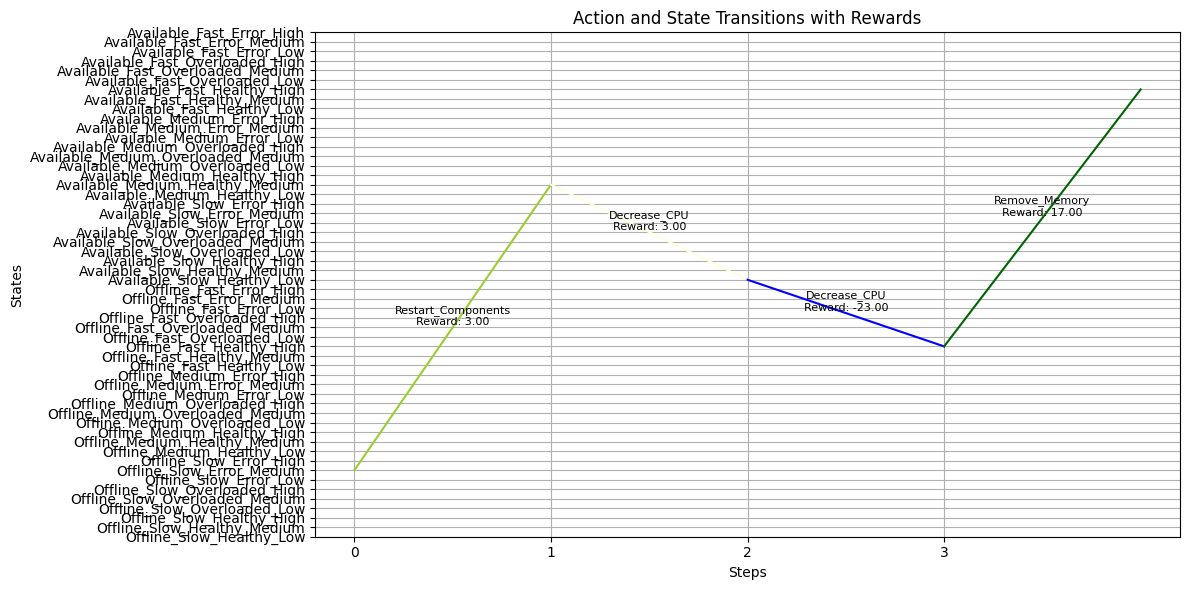

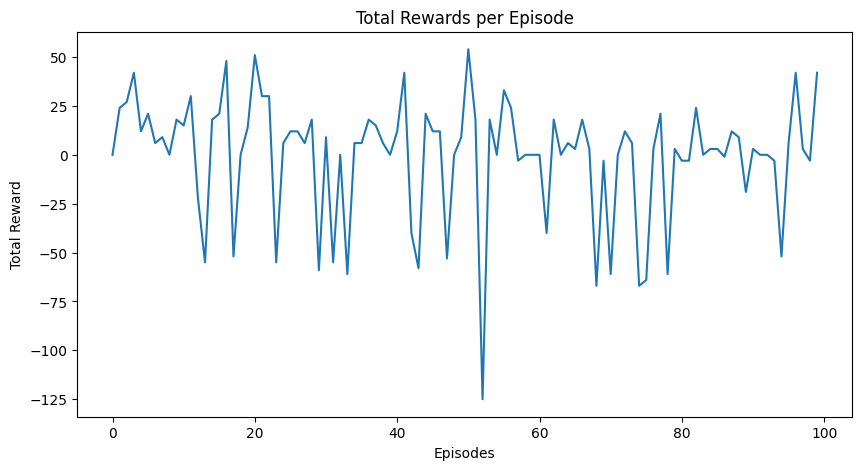

In [6]:
env = APIEnv()
env.reset()

# Executando Value Iteration
print("Executando Value Iteration...")
policy_vi, _ = value_iteration(env, theta=0.000001, discount_factor=0.9)
histories_vi, rewards_vi, total_rewards_vi = run_policy(env, policy_vi)

# Visualizando o histórico e as recompensas do primeiro episódio
plot_action_state_history(histories_vi[0], rewards_vi[0], env)

# Visualizando as recompensas acumuladas em todos os episódios
plot_total_rewards(total_rewards_vi)

## Policy Improvement



Executando Policy Improvement...
Política estável após 5 iterações
Episode 1/100
Current API state: Available_Medium_Healthy_Medium
Step 1: State=7, Action=6, Reward=3, Next State=37
Current API state: Available_Medium_Healthy_Medium
Step 2: State=37, Action=2, Reward=10, Next State=37
Current API state: Available_Slow_Healthy_Low
Step 3: State=37, Action=2, Reward=3, Next State=27
Current API state: Available_Slow_Healthy_Low
Step 4: State=27, Action=2, Reward=3, Next State=27
Current API state: Available_Slow_Healthy_Low
Step 5: State=27, Action=2, Reward=3, Next State=27
Current API state: Available_Slow_Healthy_Low
Step 6: State=27, Action=2, Reward=3, Next State=27
Current API state: Available_Slow_Healthy_Low
Step 7: State=27, Action=2, Reward=3, Next State=27
Current API state: Available_Slow_Healthy_Low
Step 8: State=27, Action=2, Reward=3, Next State=27
Current API state: Offline_Fast_Healthy_High
Step 9: State=27, Action=2, Reward=-23, Next State=20
Current API state: Availa

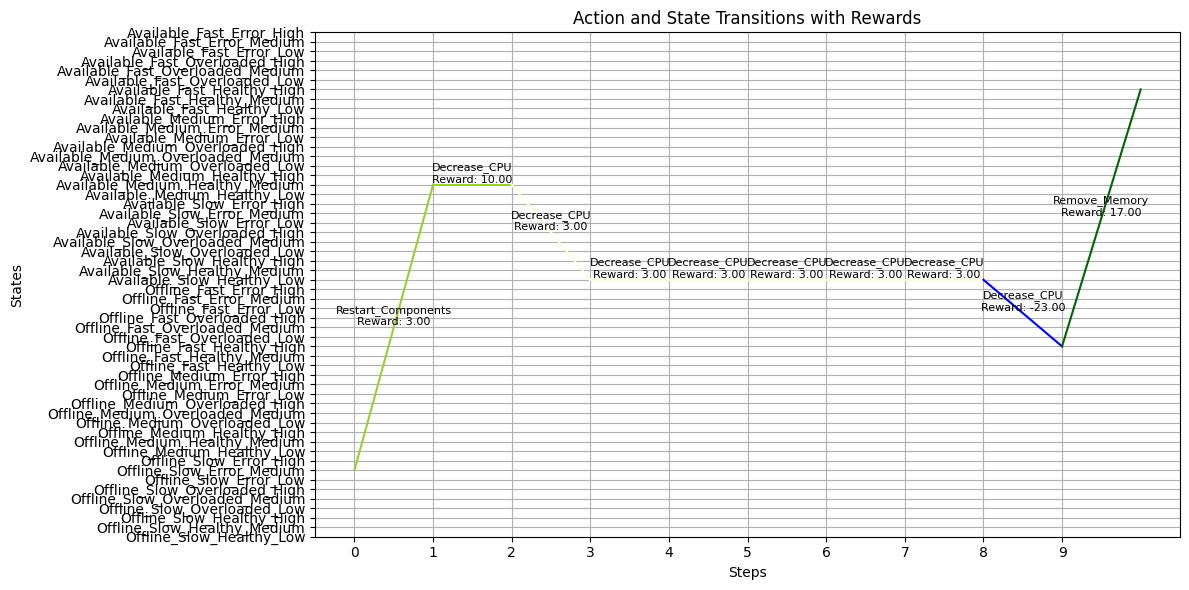

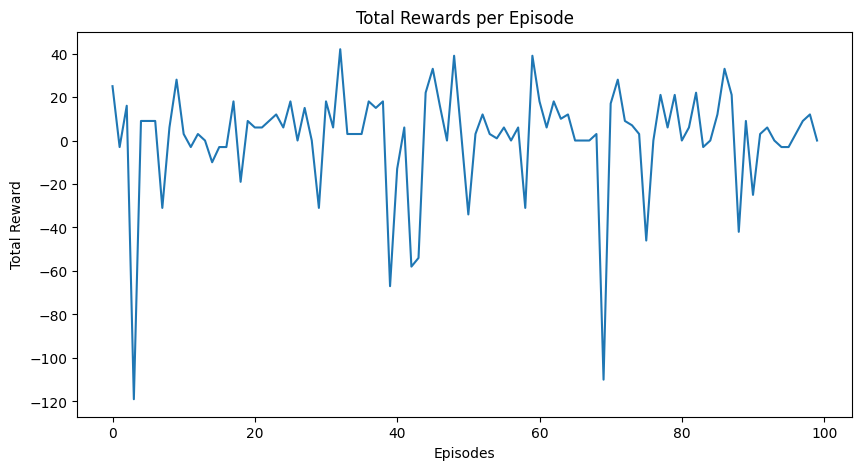

In [7]:
env = APIEnv()
env.reset()

# Executando Policy Improvement e visualizando o progresso
print("\nExecutando Policy Improvement...")
policy_pi, _ = policy_improvement(env)
histories_pi, rewards_pi, total_rewards_pi = run_policy(env, policy_pi)

# Visualizando o histórico e as recompensas do primeiro episódio
plot_action_state_history(histories_pi[0], rewards_pi[0], env)

# Visualizando as recompensas acumuladas em todos os episódios
plot_total_rewards(total_rewards_pi)

# Monte Carlo


In [8]:
from src.algorithms.monte_carlo.utils import (
    plot_action_state_history_with_rewards,
    run_monte_carlo_policy,
)
from src.algorithms.monte_carlo.epsilon_greedy_control import mc_control_epsilon_greedy


Executando Monte Carlo Control...


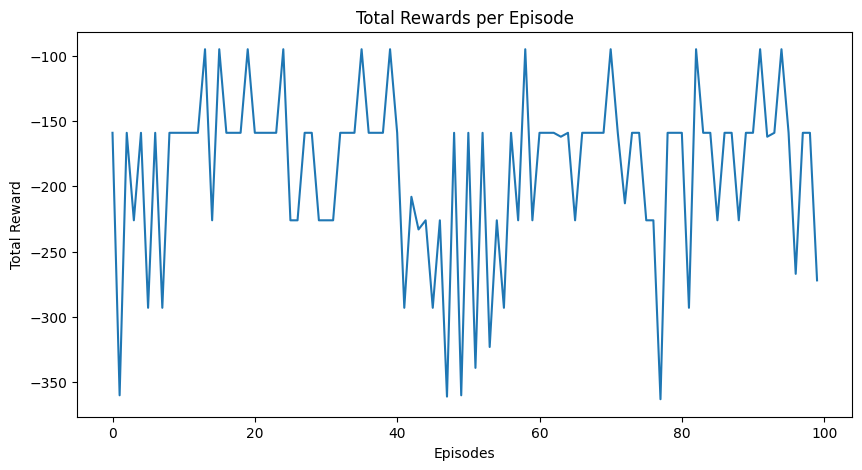

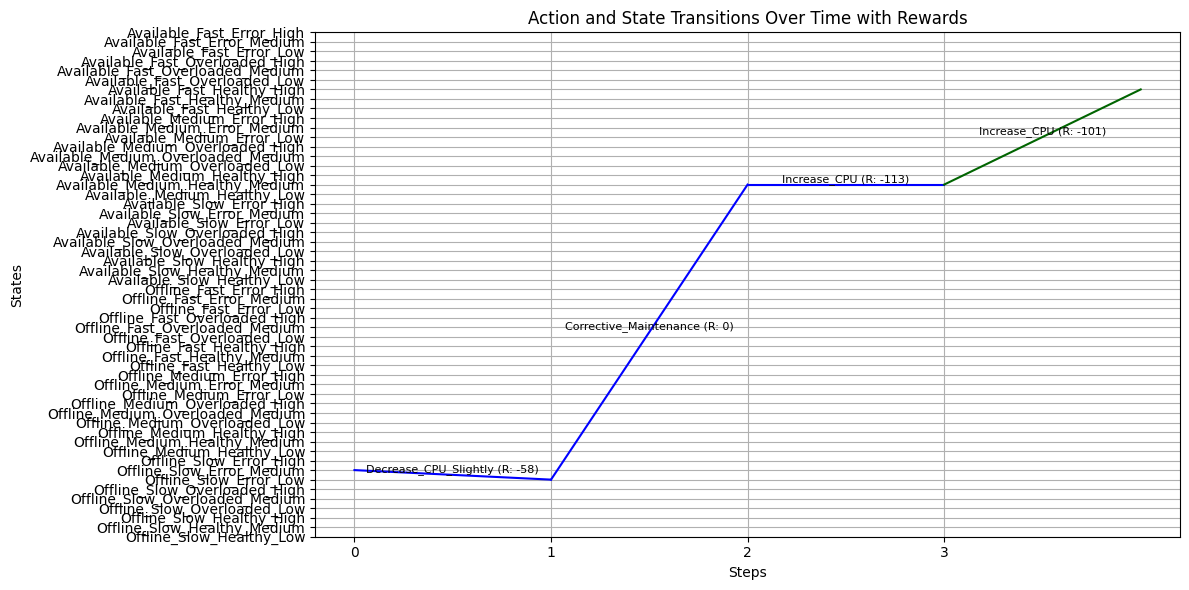

In [9]:
env = APIEnv()
num_episodes = 100  # Número de episódios de treinamento
num_steps = 100  # Passos por episódio
discount_factor = 0.99
epsilon = 0.1

print("\nExecutando Monte Carlo Control...")
Q_mc, policy_mc = mc_control_epsilon_greedy(env, num_episodes, discount_factor, epsilon)
total_rewards_mc, history_mc = run_monte_carlo_policy(
    env, policy_mc, num_episodes, num_steps
)

# Exibir recompensas totais por episódio
plot_total_rewards(total_rewards_mc)

# Exibir histórico de estados e ações com recompensas
plot_action_state_history_with_rewards(history_mc, env)

# Temporal Difference


## Q Learning


In [17]:
from src.algorithms.temporal_difference.q_learning import q_learning
from src.algorithms.temporal_difference.utils import (
    run_q_learning_policy,
    plot_action_state_history,
)

In [18]:
env = APIEnv()
env.reset()

(7, {})

In [19]:
num_episodes = 500  # Número de episódios de treinamento
alpha = 0.1  # Taxa de aprendizado
gamma = 0.99  # Fator de desconto
epsilon = 0.2  # Exploração inicial
epsilon_decay = 0.99  # Decaimento de epsilon ao longo dos episódios


Executando Q-learning...
Episode 0/500 completed.
Episode 100/500 completed.
Episode 200/500 completed.
Episode 300/500 completed.
Episode 400/500 completed.
Current API state: Offline_Slow_Error_Low
Current API state: Available_Medium_Healthy_Medium
Current API state: Available_Medium_Healthy_Medium
Current API state: Available_Medium_Healthy_Medium
Current API state: Available_Medium_Healthy_Medium
Current API state: Available_Medium_Healthy_Medium
Current API state: Available_Medium_Healthy_Medium
Current API state: Available_Medium_Healthy_Medium
Current API state: Available_Medium_Healthy_Medium
Current API state: Available_Medium_Healthy_Medium
Current API state: Available_Medium_Healthy_Medium
Current API state: Available_Medium_Healthy_Medium
Current API state: Available_Medium_Healthy_Medium
Current API state: Available_Medium_Healthy_Medium
Current API state: Available_Medium_Healthy_Medium
Current API state: Available_Medium_Healthy_Medium
Current API state: Available_Mediu

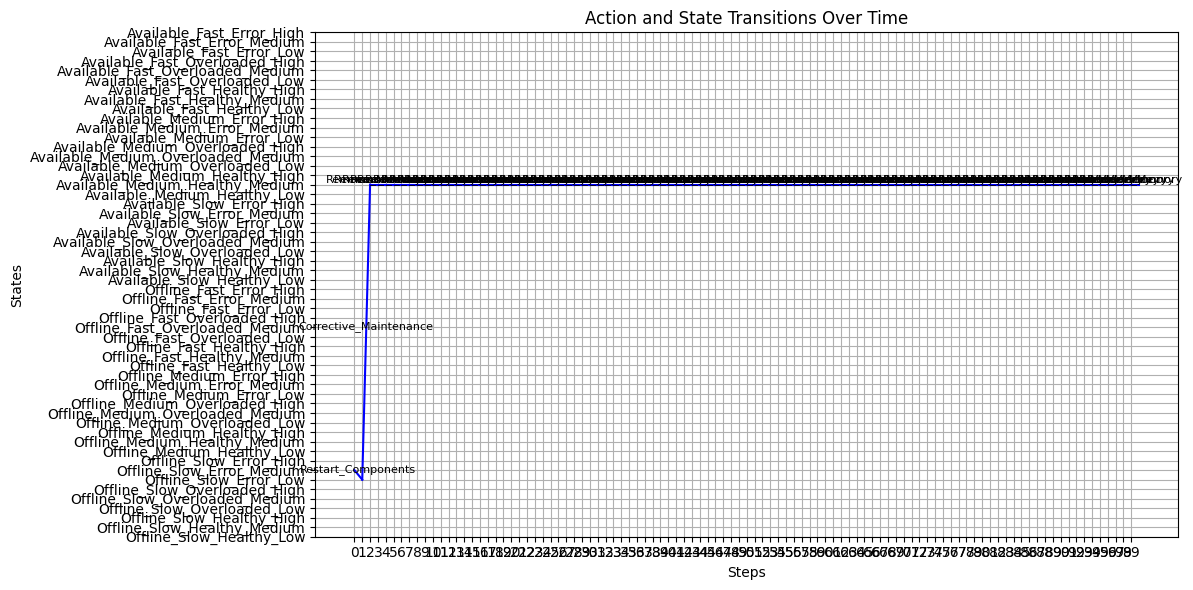

In [20]:
print("\nExecutando Q-learning...")
Q_qlearning, policy_qlearning = q_learning(
    env, num_episodes, alpha, gamma, epsilon, epsilon_decay
)
history_qlearning, rewards_qlearning = run_q_learning_policy(env, policy_qlearning)
plot_action_state_history(history_qlearning, env)

## SARSA


In [25]:
from src.algorithms.temporal_difference.sarsa import sarsa_learning
from src.algorithms.temporal_difference.utils import (
    run_sarsa_policy,
    plot_action_state_history_with_rewards,
)

In [26]:
env = APIEnv()
env.reset()

(7, {})

In [27]:
num_episodes = 500  # Número de episódios de treinamento
num_steps = 100  # Passos por episódio
gamma = 0.99  # Fator de desconto para recompensas futuras
alpha = 0.1  # Taxa de aprendizado para a atualização TD
epsilon = 0.2  # Probabilidade de escolher uma ação aleatória. Float entre 0 e 1 (padrão: 0.1).

Episode 0/500 completed.
Episode 100/500 completed.
Episode 200/500 completed.
Episode 300/500 completed.
Episode 400/500 completed.


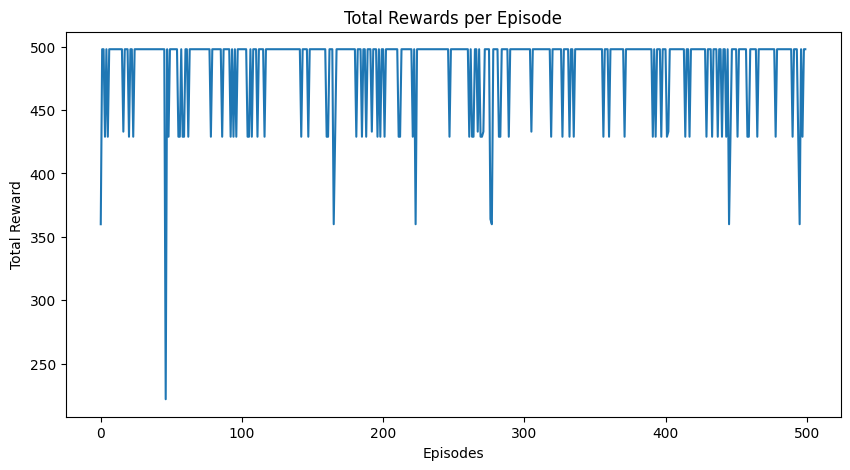

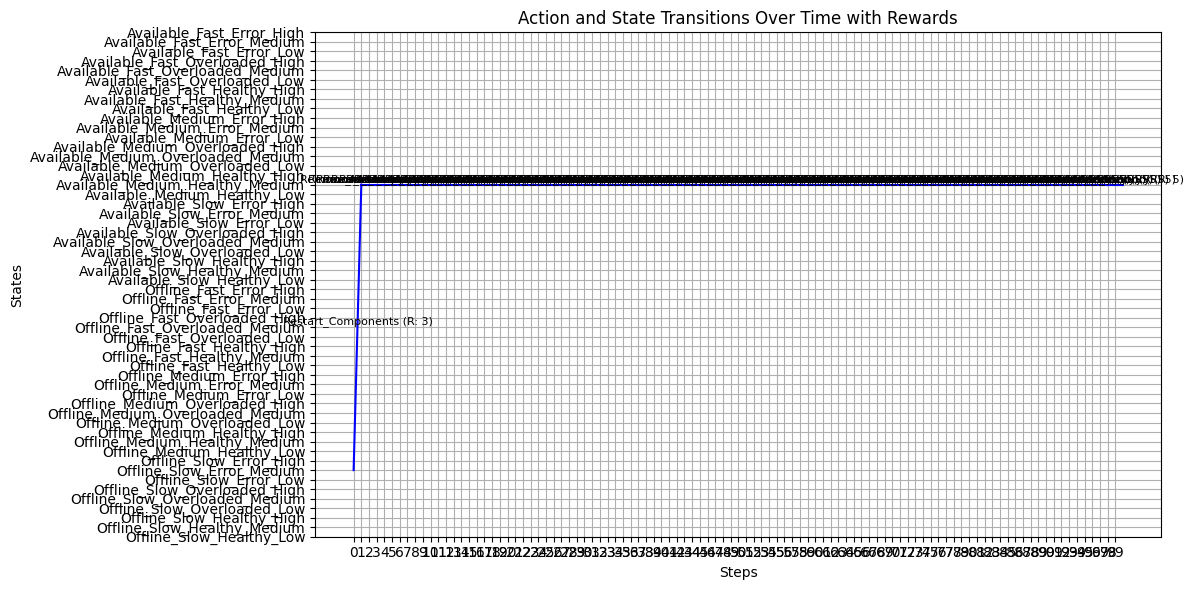

In [28]:
Q_sarsa, policy_sarsa = sarsa_learning(env, num_episodes, gamma, alpha, epsilon)
total_rewards_sarsa, history_sarsa = run_sarsa_policy(
    env, policy_sarsa, num_episodes, num_steps
)

# Exibir recompensas totais por episódio
plot_total_rewards(total_rewards_sarsa)

# Exibir histórico de estados e ações com recompensas
plot_action_state_history_with_rewards(history_sarsa, env)